**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopzs)** or **[LinkedIn](https://linkedin.com/in/jsulopzs)**

# #01 | Machine Learning & Linear Regression

## Chapter Importance

Machine Learning is all about calculating [the best numbers](https://twitter.com/sotastica/status/1449735653328031745) of a mathematical equation by [minimizing the distance between real data and predictions](https://www.youtube.com/watch?v=Ht3rYS-JilE).

The form of a Linear Regression mathematical equation is as follows:

$$
y = (a) + (b) \cdot x
$$

As we see in the following plot, **not any mathematical equation is valid**; the red line doesn't fit the real data (blue points) as well as the green one.

<center>
<img src="src/linear-regression.jpeg" width="400" align="center">
</center>

How do we understand the development of Machine Learning models in Python **to predict what may happen in the future**?

This tutorial covers the topics described below using **USA Car Crashes data** to predict the accidents based on alcohol.

1. Step by step procedure to compute a Linear Regression:
    1. `.fit()` the numbers of the mathematical equation
    2. `.predict()` the future with the mathematical equation
    3. `.score()` how good is the mathematical equation
2. How to **visualize** the Linear Regression model?
3. How to **evaluate** Regression models step by step?
    - Residuals Sum of Squares
    - Total Sum of Squares
    - R Squared Ratio $R^2$
4. How to **interpret** the coeficients of the Linear Regression?
5. Compare the Linear Regression to other Machine Learning models such as:
    - Random Forest
    - Support Vector Machines
6. Why **we don't need to know the maths** behind every model to apply Machine Learning in Python?

## [ ] Load the Data

- This dataset contains **statistics about Car Accidents** (columns)
- In each one of **USA States** (rows)

Visit [this website](https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset/) if you want to know the measures of the columns.

In [1]:
import seaborn as sns #!

df_crashes = sns.load_dataset(name='car_crashes', index_col='abbrev')[['alcohol', 'total']]
df_crashes.rename({'total': 'accidents'}, axis=1, inplace=True)
df_crashes

,alcohol,accidents
abbrev,,
AL,5.640,18.8
AK,4.525,18.1
...,...,...
WI,4.554,13.8
WY,5.568,17.4


## How do we compute a Linear Regression Model in Python?

### Import the Class

In [2]:
from sklearn.linear_model import LinearRegression

### Instantiante the Class

In [3]:
model_lr = LinearRegression()

### Fit the Model

In [4]:
model_lr.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

### Separate the Variables

In [7]:
target = df_crashes['accidents']

In [11]:
features = df_crashes[['alcohol']]

### Fit the Model Again

In [12]:
model_lr.fit(X=features, y=target)

LinearRegression()

In [13]:
model_lr.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.0325063]),
 '_residues': 231.96888653310057,
 'rank_': 1,
 'singular_': array([12.22681605]),
 'intercept_': 5.8577761548263005}

### [ ] Predictions

#### Calculate the Predictions

In [15]:
features

,alcohol
abbrev,
AL,5.640
AK,4.525
...,...
WI,4.554
WY,5.568


In [14]:
model_lr.predict(X=features)

array([17.32111171, 15.05486718, 16.44306899, 17.69509287, 12.68699734,
       13.59756016, 13.76016066, 15.73575679,  9.0955587 , 16.40851638,
       13.78455074, 20.44100889, 14.87600663, 14.70324359, 14.40446516,
       13.8353634 , 14.54064309, 15.86177218, 19.6076813 , 15.06502971,
       13.98780137, 11.69106925, 13.88211104, 11.5162737 , 16.94713055,
       16.98371566, 24.99585551, 16.45729653, 15.41868581, 12.93089809,
       12.23171592, 15.95526747, 13.10772614, 16.44306899, 26.26007443,
       15.60161138, 17.58737003, 12.62195713, 17.32517672, 14.43088774,
       25.77430543, 18.86988151, 17.3515993 , 20.84141263,  9.53254755,
       14.15040187, 12.82724027, 12.96748321, 19.40239816, 15.11380986,
       17.17477126])

#### Add a New Column with the Predictions

In [17]:
df_crashes['pred_lr'] = model_lr.predict(X=features)

In [18]:
df_crashes

,alcohol,accidents,pred_lr
abbrev,,,
AL,5.640,18.8,17.321112
AK,4.525,18.1,15.054867
...,...,...,...
WI,4.554,13.8,15.113810
WY,5.568,17.4,17.174771


### Model Visualization

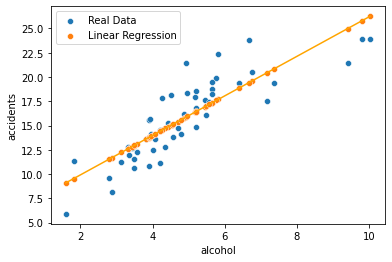

In [28]:
sns.scatterplot(x=df_crashes.alcohol, y=df_crashes.accidents, label='Real Data')
sns.scatterplot(x=df_crashes.alcohol, y=df_crashes.pred_lr, label='Linear Regression')
sns.lineplot(x=df_crashes.alcohol, y=df_crashes.pred_lr, color='orange');

### [ ] Model's Score

#### Calculate the Score

In [29]:
model_lr.score(X=features, y=target)

0.7269492966665405

#### Explain the Score

##### Residuals

In [36]:
df_crashes['residuals'] = df_crashes.accidents - df_crashes.pred_lr

In [38]:
df_crashes.residuals.sum()

1.7053025658242404e-13

In [39]:
df_crashes.residuals.sum().round(2)

0.0

In [41]:
df_crashes['residuals2'] = df_crashes.residuals**2

In [43]:
df_crashes.residuals2.sum()

231.96888653310063

In [51]:
RSS = df_crashes.residuals2.sum()

##### Target's Variation

In [52]:
((df_crashes.accidents - df_crashes.accidents.mean())**2).sum()

849.5450980392156

In [53]:
TSS = ((df_crashes.accidents - df_crashes.accidents.mean())**2).sum()

##### The Ratio

In [57]:
RSS/TSS

0.2730507033334595

In [58]:
1 - RSS/TSS

0.7269492966665405

In [59]:
model_lr.score(X=features, y=target)

0.7269492966665405

### [ ] Model Interpretation

In [60]:
model_lr.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.0325063]),
 '_residues': 231.96888653310057,
 'rank_': 1,
 'singular_': array([12.22681605]),
 'intercept_': 5.8577761548263005}

In [61]:
model_lr.intercept_

5.8577761548263005

In [62]:
model_lr.coef_

array([2.0325063])

In [ ]:
accidents = (5.85) + (2.03) * alcohol

In [63]:
import pandas as pd

In [65]:
df_to_pred = pd.DataFrame({'alcohol': [1,2,3,4,5]})

In [68]:
df_to_pred['pred'] = 5.85 + 2.03*df_to_pred.alcohol

In [71]:
df_to_pred['increments'] = df_to_pred.pred.diff()

In [72]:
df_to_pred

,alcohol,pred,increments
0,1,7.88,NaN
1,2,9.91,2.03
2,3,11.94,2.03
3,4,13.97,2.03
4,5,16.00,2.03


## Other Regression Models

### `RandomForestRegressor()` in Python

#### Fit the Model

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
model_rf = RandomForestRegressor()

In [75]:
model_rf.fit(X=features, y=target)

RandomForestRegressor()

#### Calculate Predictions

In [77]:
model_rf.predict(X=features)

array([18.643 , 16.748 , 17.3818, 21.261 , 12.178 , 13.273 , 12.566 ,
       17.603 ,  7.495 , 17.7385, 14.774 , 18.497 , 15.041 , 14.392 ,
       13.897 , 15.219 , 15.291 , 20.146 , 20.963 , 15.698 , 13.251 ,
        9.074 , 14.757 ,  9.69  , 17.251 , 16.561 , 22.001 , 16.0688,
       14.484 , 11.375 , 11.58  , 18.978 , 11.82  , 17.3818, 23.601 ,
       14.956 , 20.361 , 12.431 , 18.463 , 12.453 , 23.601 , 20.817 ,
       19.116 , 19.295 ,  9.871 , 13.244 , 12.312 , 11.005 , 22.415 ,
       14.236 , 17.856 ])

In [78]:
df_crashes['pred_rf'] = model_rf.predict(X=features)

#### Model's Score

In [79]:
model_rf.score(X=features, y=target)

0.9519248474692336

### `SVR()` in Python

#### Fit the Model

In [80]:
from sklearn.svm import SVR

In [81]:
model_sv = SVR()

In [82]:
model_sv.fit(X=features, y=target)

SVR()

#### Calculate Predictions

In [83]:
model_sv.predict(X=features)

array([18.29570777, 15.18462721, 17.2224187 , 18.6633175 , 12.12434781,
       13.10691581, 13.31612684, 16.21131216, 12.66062465, 17.17537208,
       13.34820949, 19.38920329, 14.91415215, 14.65467023, 14.2131504 ,
       13.41560202, 14.41299448, 16.39752499, 19.4896662 , 15.20002787,
       13.62200798, 11.5390483 , 13.47824339, 11.49818909, 17.87053595,
       17.9144274 , 19.60736085, 17.24170425, 15.73585463, 12.35136579,
       11.784815  , 16.53431108, 12.53373232, 17.2224187 , 19.4773929 ,
       16.01115736, 18.56379706, 12.06891287, 18.30002795, 14.25171609,
       19.59597679, 19.37950461, 18.32794218, 19.29994413, 12.26345665,
       13.84847453, 12.25128025, 12.38791686, 19.48212198, 15.27397732,
       18.1357253 ])

In [84]:
df_crashes['pred_sv'] = model_sv.predict(X=features)

#### Model's Score

In [85]:
model_sv.score(X=features, y=target)

0.7083438012012769

## Which One Is the Best? Why?

In [86]:
model_lr.score(X=features, y=target)

0.7269492966665405

In [87]:
model_rf.score(X=features, y=target)

0.9519248474692336

In [88]:
model_sv.score(X=features, y=target)

0.7083438012012769

## [ ] Visualize the 3 Models

In [89]:
df_crashes[['accidents', 'pred_lr', 'pred_rf', 'pred_sv']]

,accidents,pred_lr,pred_rf,pred_sv
abbrev,,,,
AL,18.8,17.321112,18.643,18.295708
AK,18.1,15.054867,16.748,15.184627
...,...,...,...,...
WI,13.8,15.113810,14.236,15.273977
WY,17.4,17.174771,17.856,18.135725


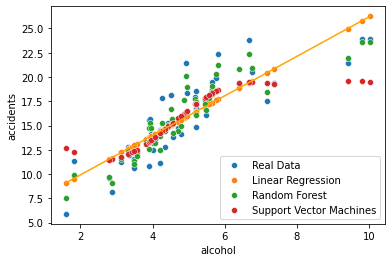

In [91]:
sns.scatterplot(x=df_crashes.alcohol, y=df_crashes.accidents, label='Real Data')
sns.scatterplot(x=df_crashes.alcohol, y=df_crashes.pred_lr, label='Linear Regression')
sns.lineplot(x=df_crashes.alcohol, y=df_crashes.pred_lr, color='orange')
sns.scatterplot(x=df_crashes.alcohol, y=df_crashes.pred_rf, label='Random Forest')
sns.scatterplot(x=df_crashes.alcohol, y=df_crashes.pred_sv, label='Support Vector Machines');

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.